# **Representação de espaços de estados**

Fundamento principal: representar uma equação diferencial de ordem elevada através de várias equações de primeira ordem, *acopladas*. Essas equações são chamadas de **equações de estados**

O termo "acopladas" quer dizer que a diferencial de uma variável depende de outras variáveis do sistema de equações. Numa equação diferencial ordinária (EDO), temos que as derivadas de uma função dependendo dela mesma. No caso das equações de estados temos a derivada de uma função dependendo de outra função que também é incognita. 

As "funções incógnitas" de um sistema de equações de estado são chamadas variáveis de estado. Elas recebem esse nome especial porque às vezes elas representam fenômenos "internos" do sistema, associados à física mais elementar que acontece dentro dele. 

Essas variáveis passam despercebidas na representação entrada-saída (função de transferência), porque nesta, por definição só nos preocupamos com as variáveis que realmente podemos medir. As variáveis de estado nem sempre podemos medir fisicamente.

Um exemplo interessante de variável de estado que existe, mas não medimos: os fluxos magnéticos em uma máquina elétrica. Esses fluxos aparecem na modelagem e influenciam nas grandezas que conseguimos medir (corrente, tensão, velocidade), mas na prática nunca instalamos sensores para efetivamente medí-los.

Exemplo de estados que podemos medir, mas nem sempre o fazemos: em um circuito elétrico, as tensões nos capacitores e as correntes nos indutores normalmente são escolhidas como variáveis de estado. Existem sensores para medir essas grandezas fisicamente e podemos usá-las como estados do modelo de um circuito. Outra possibilidade é a carga elétrica nos capacitores e o enlace de fluxo nos indutores do mesmo circuito. Porém, essas variáveis são de difícil medição. 

Vamos usar muito a representação de "ponto" para derivada, isto é: 

$$
\begin{align}
    \frac{dx(t)}{dt} &= \dot{x}(t) \text{ ou simplesmente } \dot{x}\\
    \frac{d^2x(t)}{dt^2} &= \ddot{x}(t) \text{ ou simplesmente } \ddot{x}
\end{align}
$$

Exemplo: supondo $x_1$ e $x_2$ variáveis de estado, $u$ sinal e entrada e $y$ sinal de saída

$$
\begin{align}
    \dot{x}_1 &= x_2\\
    \dot{x}_2 &= -x_1-x_2+8u\\
    y &= 9x_1+x_2
\end{align}
$$

## Detalhes da representação

* Repare o uso de negrito para representar grandezas matriciais
* O número de equações de estado (diferenciais) é igual ao número de variáveis de estado, que é igual a ordem do sistema.
* A interpretação de ordem aqui é a mesma de "ordem" da equação diferencial

Quando o sistema é linear, a representação de estados de qualquer ordem pode ser dada por uma representação através de **matrizes**

$$
\begin{align}
    \mathbf{\dot{x}} &= \mathbf{Ax} + \mathbf{B}u\\
    y &= \mathbf{Cx} + Du
\end{align}
$$

No nosso caso, vamos sempre considerar que o sistema é 1-entrada-1-saída (SISO). Neste caso as matrizes de um sistema de ordem $n$ tem, necessariamente, as dimensões:
* $\mathbf{A}$: $n\times n$ (quadrada de ordem $n$)
* $\mathbf{B}$: $n\times 1$ (vetor coluna de $n$ elementos)
* $\mathbf{C}$: $n\times n$ (vetor linha de $n$ elementos)
* $D$: $1\times 1$ (escalar)

**Exemplo:**
$$
\begin{align}
    \mathbf{\dot{x}} &= \left[\begin{array}{rr} 0 & 1\\-1 & -1 \end{array} \right]\mathbf{x} + 
    \left[\begin{array}{r} -2 \\ 5\end{array}\right]u\\
    y &= \left[\begin{array}{rr} 3 & 1\end{array} \right]\mathbf{x}
\end{align}
$$

# **Solução do exemplo 7.2 do livro**

In [ ]:
import control as ct
import numpy as np
from matplotlib import pyplot as plt
# Bibliotecas que vamos usar


In [ ]:
# Constantes dadas no problema
b_m = 0.05
_1m = 0.001

# Criação das matrizes. 
F = np.array([[0,1],[0, -b_m]])
G = np.array([[0],[_1m]])
H = np.array([[0,1]])
J = 0
# Poderíamos ter usado listas também, mas o livro multiplica a matriz G por 500. 
# Aí neste caso é melhor ela estar definida como array do numpy

# Definição do sistema. "ss" significa "state space", espaço de estados em inglês
sys = ct.ss(F,500*G,H,J)
print(sys)

(0.0, 100.0)

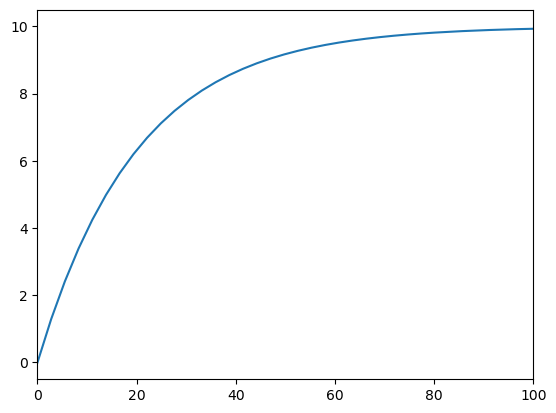

In [29]:
# Função de resposta ao degrau da biblioteca "control"
t,y=ct.step_response(sys)

# A matriz "t" contém o tempo, "y" contém os valores de saída
plt.plot(t,y)
plt.xlim([0,100])
# Encurtamos o gráfico para até 100 segundos para a figura ficar igual a do livro

In [31]:
ct.ss2tf(sys)

TransferFunction(array([0.5]), array([1.  , 0.05]))

A função "ss2tf" converte de espaço de estados para função de transferência. Mas o resultado foi uma função de primeira ordem, embora o sistema fosse de segunda (2 equações/variáveis de estado). O que aconteceu?

*Exemplos 7.3 a 7.6 serão resolvidos manualmente*